In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
myyear = 2015
mymonth  = 1
myday = 1
myhour = 13
mymin = 10
mysec = 56
mydate = datetime(myyear, mymonth, myday)
mydate

datetime.datetime(2015, 1, 1, 0, 0)

In [4]:
#Set var = datetime(......) format is year, month, day, hour, min, sec
mydatetime = datetime(myyear, mymonth, myday, myhour, mymin, mysec)
#var.year will present year
mydatetime.year

2015

In [5]:
myseries = pd.Series(['Nov 3, 1990', '2001-01-01', None])
myseries

0    Nov 3, 1990
1     2001-01-01
2           None
dtype: object

In [6]:
#to_datetime = adjsut all string that might contain dates to one
newser = pd.to_datetime(myseries, format='mixed', errors='coerce')
newser

0   1990-11-03
1   2001-01-01
2          NaT
dtype: datetime64[ns]

In [7]:
sales = pd.read_csv('./data/RetailSales_BeerWineLiquor.csv')
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
335,2019-12-01,6630
336,2020-01-01,4388
337,2020-02-01,4533
338,2020-03-01,5562


In [8]:
sales['DATE'] = pd.to_datetime(sales['DATE'])
sales['DATE']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

In [9]:
#USE PARSE_DATES TO MAKE DATETIME FAST
sales = pd.read_csv('./data/RetailSales_BeerWineLiquor.csv', parse_dates=['DATE'])
sales = sales.set_index('DATE')
sales

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2019-12-01,6630
2020-01-01,4388
2020-02-01,4533


In [10]:
sales.resample(rule='YE').mean().round(2)

,MRTSSM4453USN
DATE,
1992-12-31,1807.25
1993-12-31,1794.83
1994-12-31,1841.75
1995-12-31,1833.92
1996-12-31,1929.75
1997-12-31,2006.75
1998-12-31,2115.17
1999-12-31,2206.33
2000-12-31,2375.58


Visualization

In [11]:
fb_data = pd.read_csv('./data/stock/FB.csv', parse_dates=['Date'])
fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-06,126.669998,129.940002,126.470001,129.729996,129.729996,26278400
1,2016-09-07,130.039993,131.979996,129.949997,131.050003,131.050003,27990800
2,2016-09-08,130.919998,131.080002,129.809998,130.270004,130.270004,15676600
3,2016-09-09,129.710007,129.949997,127.099998,127.099998,127.099998,27100700
4,2016-09-12,125.959999,128.759995,125.750000,128.690002,128.690002,21252800


<Axes: >

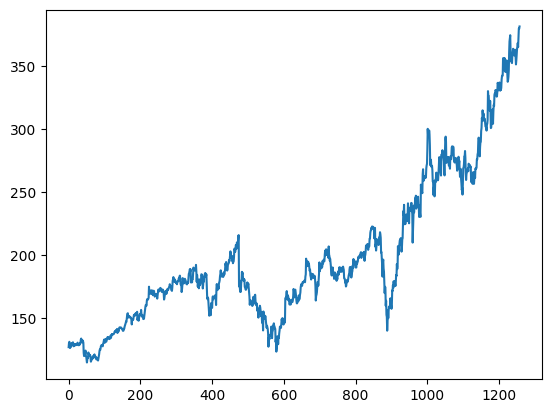

In [12]:
fb_data.Open.plot()

<Axes: >

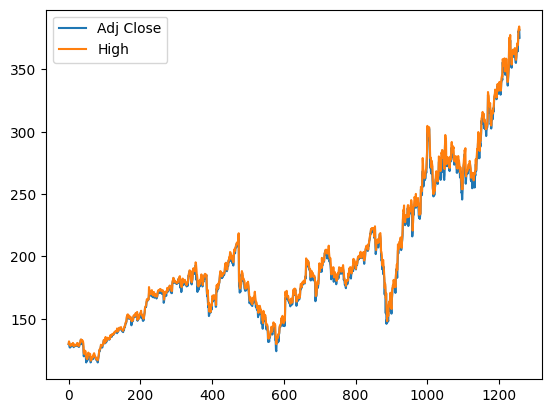

In [13]:
fb_data[['Adj Close', 'High']].plot()

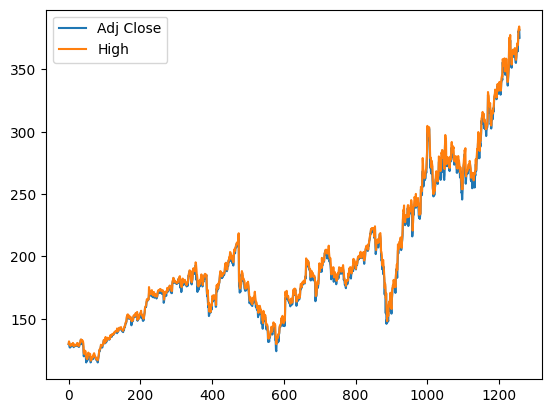

In [14]:
fb_data[['Adj Close', 'High']].plot(kind='line')
plt.show()

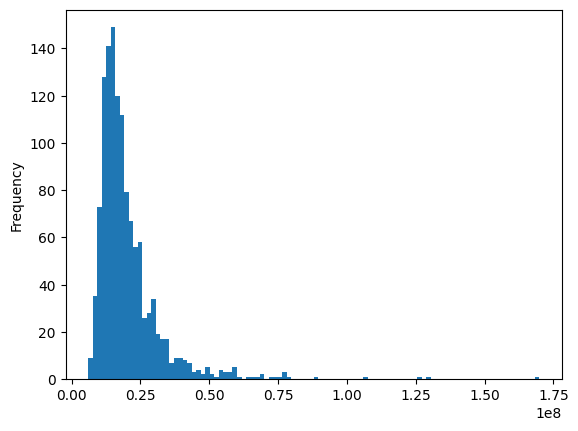

In [15]:
fb_data['Volume'].plot(kind='hist', bins=100)
plt.show()

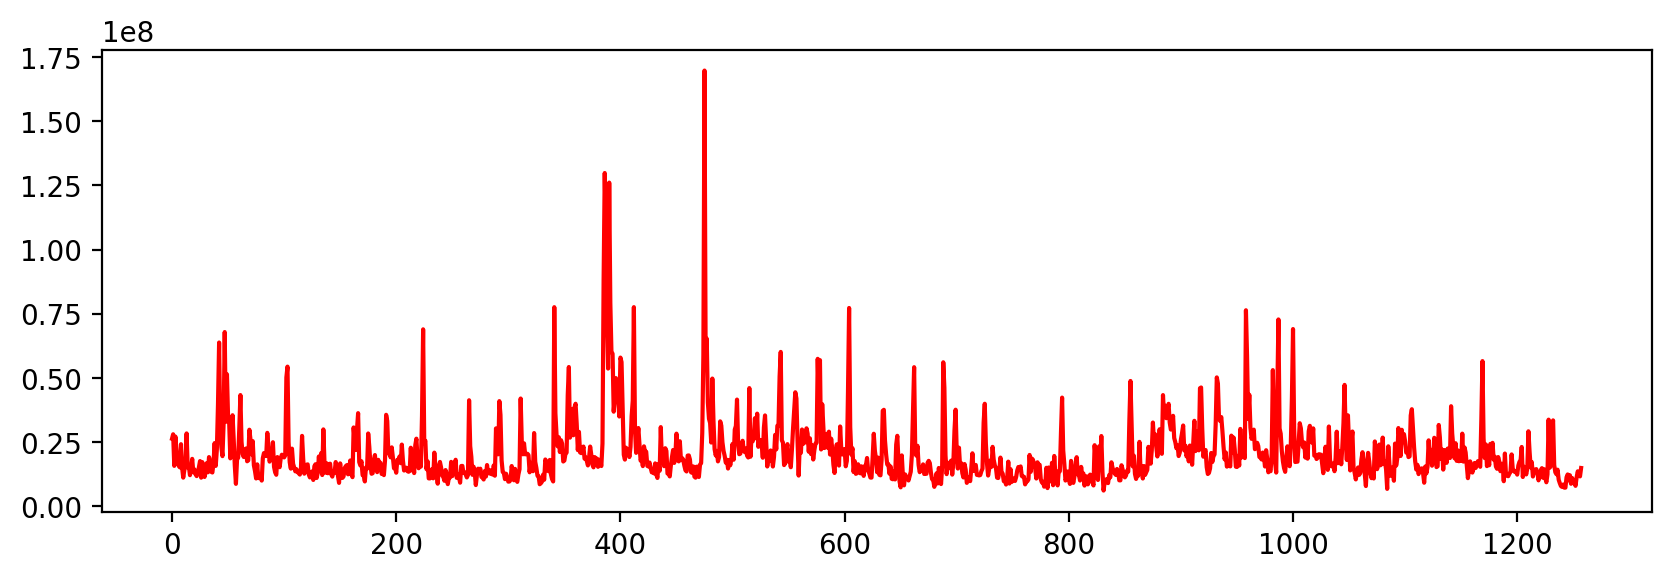

In [16]:
#Sharper DPI and PLT usage
plt.figure(figsize=(10,3), dpi=200)
fb_data['Volume'].plot(kind='line', c='red')
plt.show()

Two or more datframes for plotting

In [17]:
new_df = pd.read_csv('./data/stock/TGT.csv')

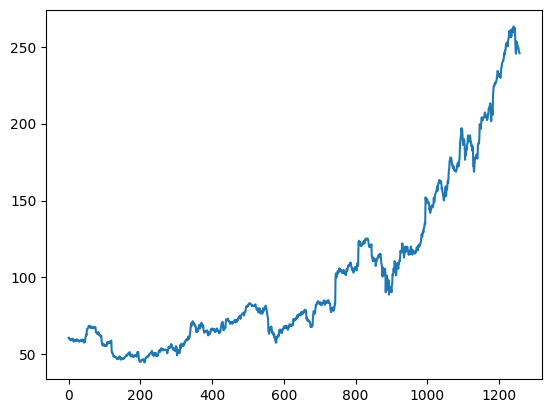

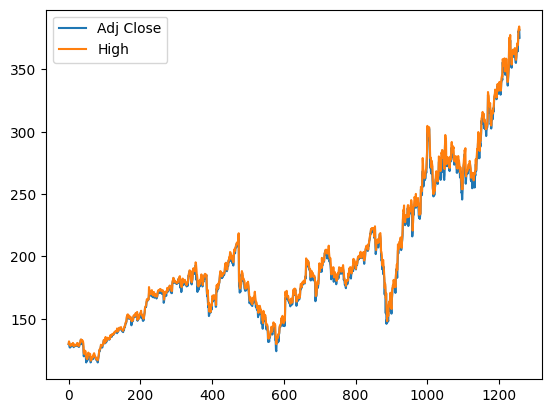

In [18]:
new_df['Adj Close'].plot(label='TGT')
fb_data[['Adj Close', 'High']].plot(label='FB Data')
plt.legend()

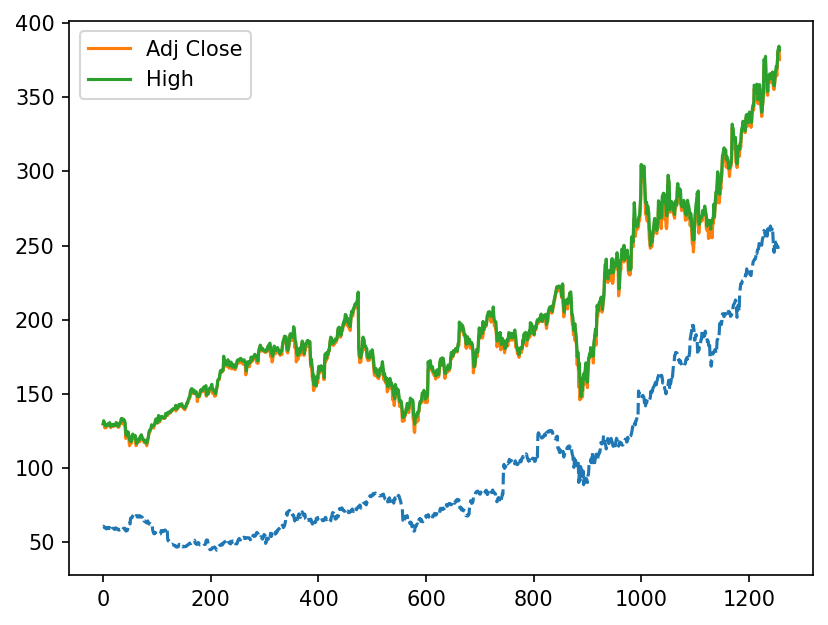

In [19]:
#Optimal version
fig, ax = plt.subplots(dpi=150)
new_df['Adj Close'].plot(ax=ax, ls='--')
fb_data[['Adj Close', 'High']].plot(ax=ax)
plt.show()

Timeseries plot

In [20]:
data = pd.read_csv('./data/stock/COST.csv', index_col='Date', parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,158.130005,158.149994,156.020004,158.059998,140.896622,2716900
2016-09-07,157.639999,157.869995,155.399994,155.639999,138.739395,2984100
2016-09-08,155.190002,155.490005,152.940002,153.470001,136.805038,2993100
2016-09-09,152.589996,152.789993,150.699997,150.699997,134.335831,2993900
2016-09-12,150.500000,151.990005,150.259995,151.690002,135.218338,2982400


<Axes: xlabel='Date'>

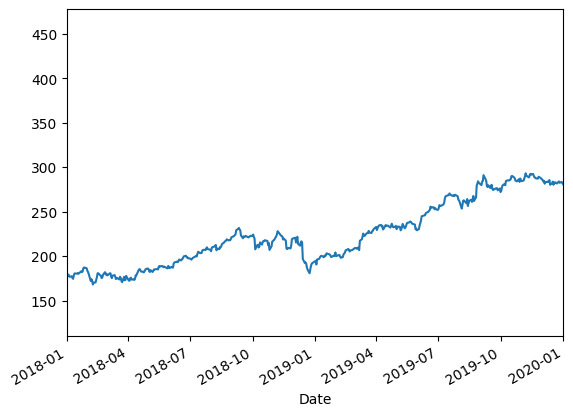

In [21]:
#xlim = limits only the x limites, so y will stay same.
data['Adj Close'].plot(xlim=['2018-01-01', '2020-01-01'])

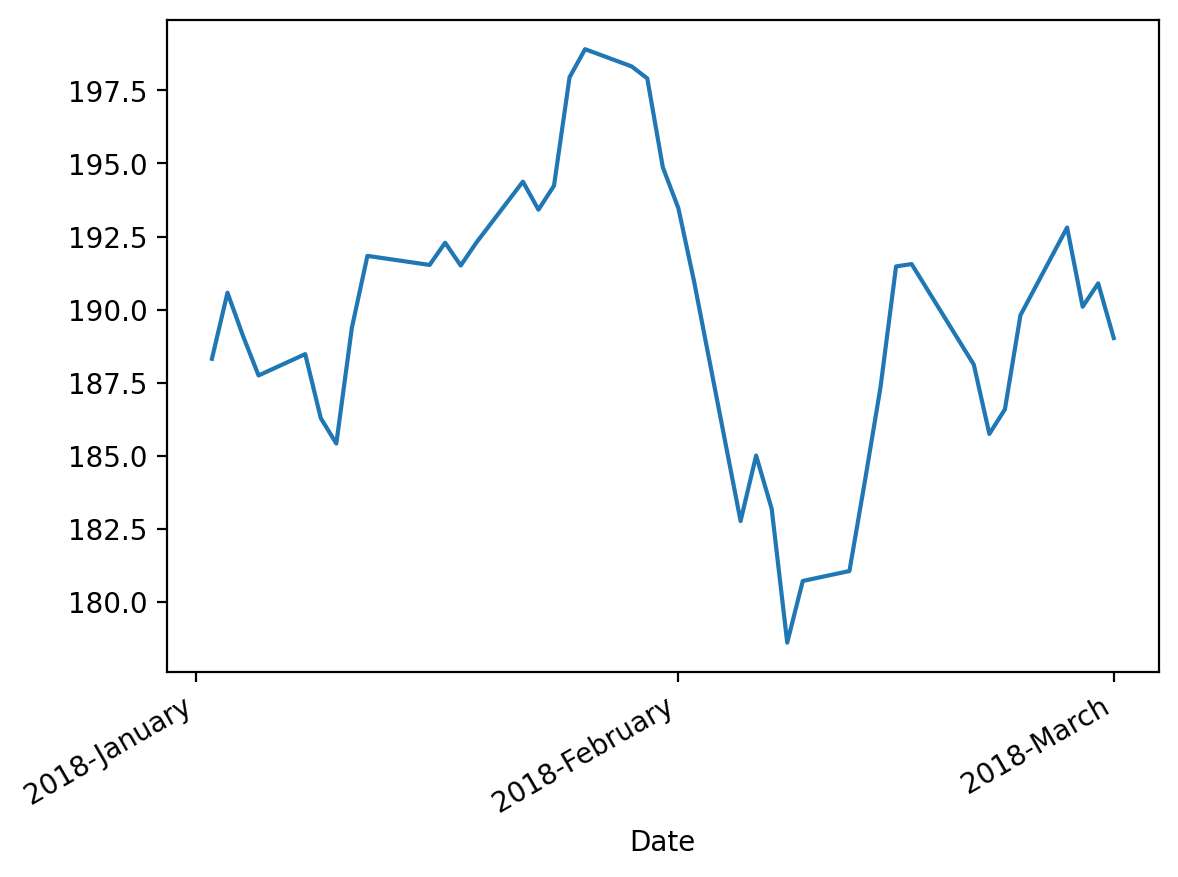

In [22]:
#Use dates for making graph better and avoid problem with dataframes in x axis
from matplotlib import dates
plt.figure(dpi=200)
ax = data.Close['2018-01-01':'2018-03-01'].plot()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%B'))

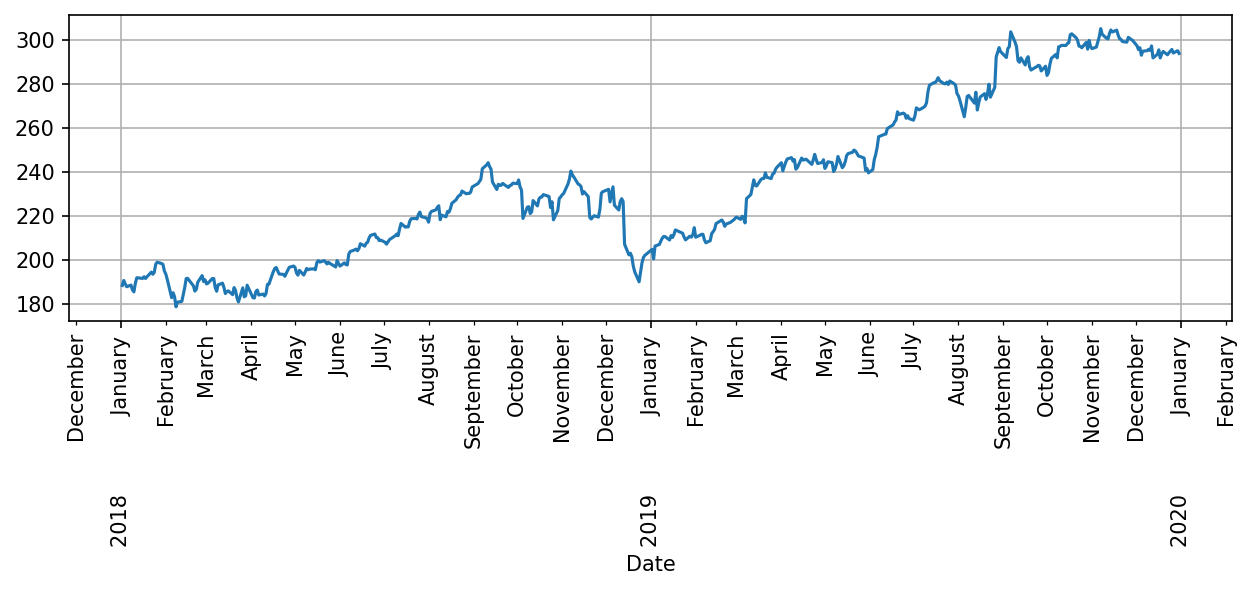

In [23]:
#Example of good plotting
plt.figure(figsize=(10,3), dpi=150)
ax = data['Close']['2018-01-01':'2020-01-01'].plot()
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y            %B'))
ax.tick_params(axis='x', which='major', rotation = 90)
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax.tick_params(axis='x', which='minor', rotation = 90)

plt.xticks(ha='center')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

Rolling statistic

In [24]:
data = pd.read_csv('./data/stock/WMT.csv', index_col='Date', parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,72.760002,73.080002,72.199997,73.000000,65.758080,9570900
2016-09-07,73.000000,73.050003,72.010002,72.059998,64.911324,9618300
2016-09-08,71.889999,72.320000,71.709999,71.830002,64.704163,9661200
2016-09-09,71.320000,71.510002,70.300003,70.300003,63.325943,12172600
2016-09-12,70.790001,72.239998,70.720001,71.940002,64.803238,10864000


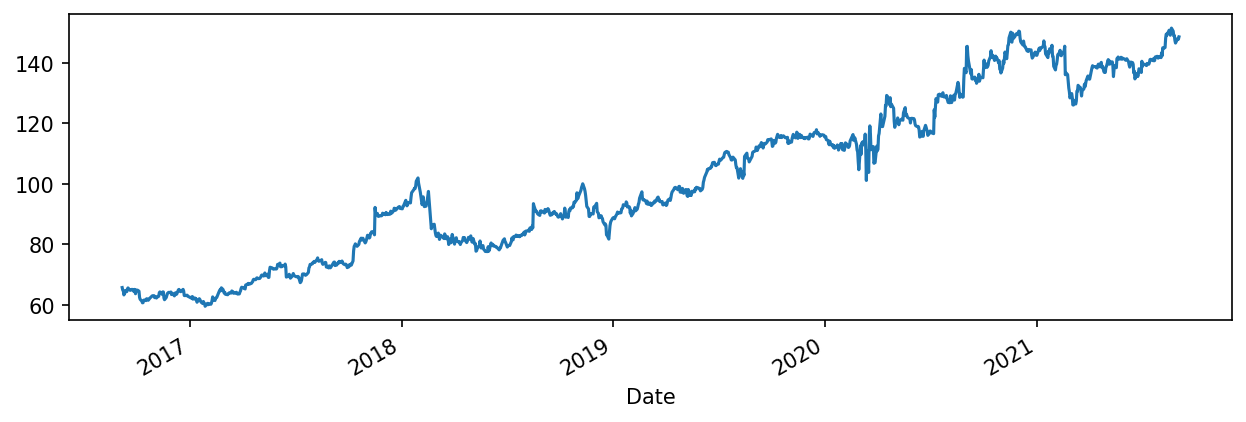

In [25]:
plt.figure(figsize=(10,3), dpi=150)
data['Adj Close'].plot()
plt.show()

<Axes: xlabel='Date'>

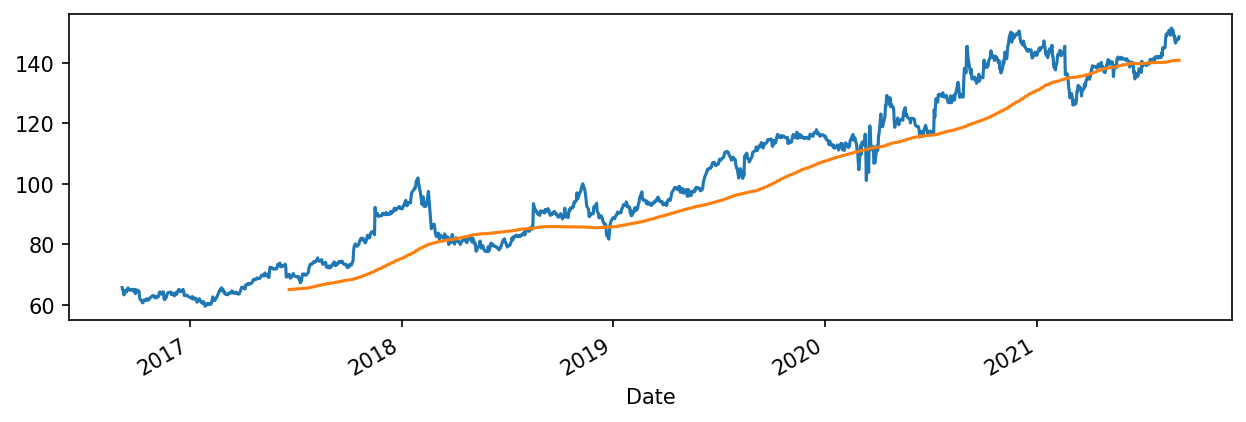

In [26]:
plt.figure(figsize=(10,3), dpi=150)
data['Adj Close'].plot()
data['Adj Close'].rolling(200).mean().plot()

<Axes: xlabel='Date'>

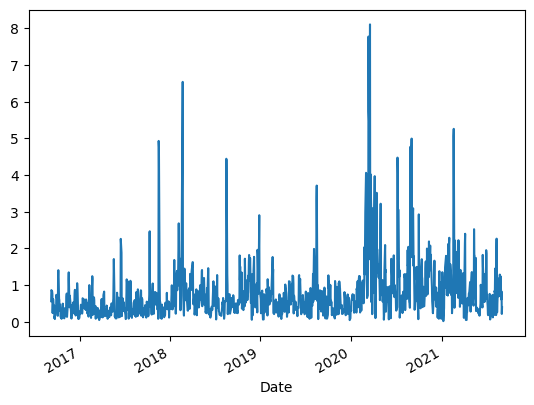

In [27]:
#Price jumps
data['Adj Close'].rolling(3).std().plot()

Time shifting and Row Calculations

In [28]:
data = pd.read_csv('./data/stock/WMT.csv', index_col='Date', parse_dates = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,72.760002,73.080002,72.199997,73.000000,65.758080,9570900
2016-09-07,73.000000,73.050003,72.010002,72.059998,64.911324,9618300
2016-09-08,71.889999,72.320000,71.709999,71.830002,64.704163,9661200
2016-09-09,71.320000,71.510002,70.300003,70.300003,63.325943,12172600
2016-09-12,70.790001,72.239998,70.720001,71.940002,64.803238,10864000


In [29]:
#Shift(), moves data by choosen number
data.shift(1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-07,72.760002,73.080002,72.199997,73.000000,65.758080,9570900.0
2016-09-08,73.000000,73.050003,72.010002,72.059998,64.911324,9618300.0
2016-09-09,71.889999,72.320000,71.709999,71.830002,64.704163,9661200.0
2016-09-12,71.320000,71.510002,70.300003,70.300003,63.325943,12172600.0


In [30]:
#diff(), presentes the differences between dates
data['Adj Close'].diff(1)

Date
2016-09-06         NaN
2016-09-07   -0.846756
2016-09-08   -0.207161
2016-09-09   -1.378220
2016-09-12    1.477295
                ...   
2021-08-27   -0.830002
2021-08-30    1.179993
2021-08-31    0.400009
2021-09-01   -0.320007
2021-09-02    0.779999
Name: Adj Close, Length: 1258, dtype: float64

In [31]:
#Percentage change between stock prices (price differneces by percentage)
data['Adj Close'].pct_change(1)

Date
2016-09-06         NaN
2016-09-07   -0.012877
2016-09-08   -0.003191
2016-09-09   -0.021300
2016-09-12    0.023328
                ...   
2021-08-27   -0.005633
2021-08-30    0.008053
2021-08-31    0.002708
2021-09-01   -0.002161
2021-09-02    0.005278
Name: Adj Close, Length: 1258, dtype: float64

In [32]:
#Cumsum and cumprod
series = pd.Series([1,2,3,4,5])
series.cumsum()

0     1
1     3
2     6
3    10
4    15
dtype: int64

In [33]:
series.cumprod()

0      1
1      2
2      6
3     24
4    120
dtype: int64

In [51]:
import pandas_datareader.data as web
import yfinance as yf

In [52]:
start_date = '2020-01-01'
end_date = '2021-01-01'
data = yf.download('AAPL', start=start_date, end = end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796005,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088272,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662727,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320992,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484360,132079200


In [54]:
#yf.Ticker = allowes to get more data from particular ticker]
apple_ticker = yf.Ticker('AAPL')

In [59]:
apple_balance = apple_ticker.get_balance_sheet()
apple_balance.head()

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TreasurySharesNumber,NaN,0.0,NaN,NaN,NaN
OrdinarySharesNumber,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
ShareIssued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
NetDebt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
TotalDebt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN


In [53]:
#fred data
inflation_data = web.DataReader('T10YIE', 'fred', start=start_date, end=end_date)
inflation_data.head()

,T10YIE
DATE,
2020-01-01,NaN
2020-01-02,1.80
2020-01-03,1.77
2020-01-06,1.75
2020-01-07,1.74


Exercise

In [61]:
stock_data = yfinance.download("SPY", start="2000-1-1",end='2021-1-1')
stock_data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.43750,93.004944,8164300
2000-01-04,143.53125,144.06250,139.640625,139.75000,89.367867,8089800
2000-01-05,139.93750,141.53125,137.250000,140.00000,89.527710,12177900
2000-01-06,139.62500,141.50000,137.750000,137.75000,88.088875,6227200
2000-01-07,140.31250,145.75000,140.062500,145.75000,93.204720,8066500
2000-01-10,146.25000,146.90625,145.031250,146.25000,93.524544,5741700
2000-01-11,145.81250,146.09375,143.500000,144.50000,92.405373,7503700
2000-01-12,144.59375,144.59375,142.875000,143.06250,91.486137,6907700
2000-01-13,144.46875,145.75000,143.281250,145.00000,92.725143,5158300


In [62]:
#Check info
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2000-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5284 non-null   float64
 1   High       5284 non-null   float64
 2   Low        5284 non-null   float64
 3   Close      5284 non-null   float64
 4   Adj Close  5284 non-null   float64
 5   Volume     5284 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 289.0 KB


**Task: Plot the Adjusted Closing price of the SP500, with the price on the y axis and the year on the x axis. Use Locator() and Formatter() techniques to configure the plot x axis so that you can see a tick for every year in the dataset (only showing the year number, not the full YYYY-MM-DD that is the default). Choose a reasonable figure size, set the dpi to 300 and save this plot in your working directory as sp500.png**

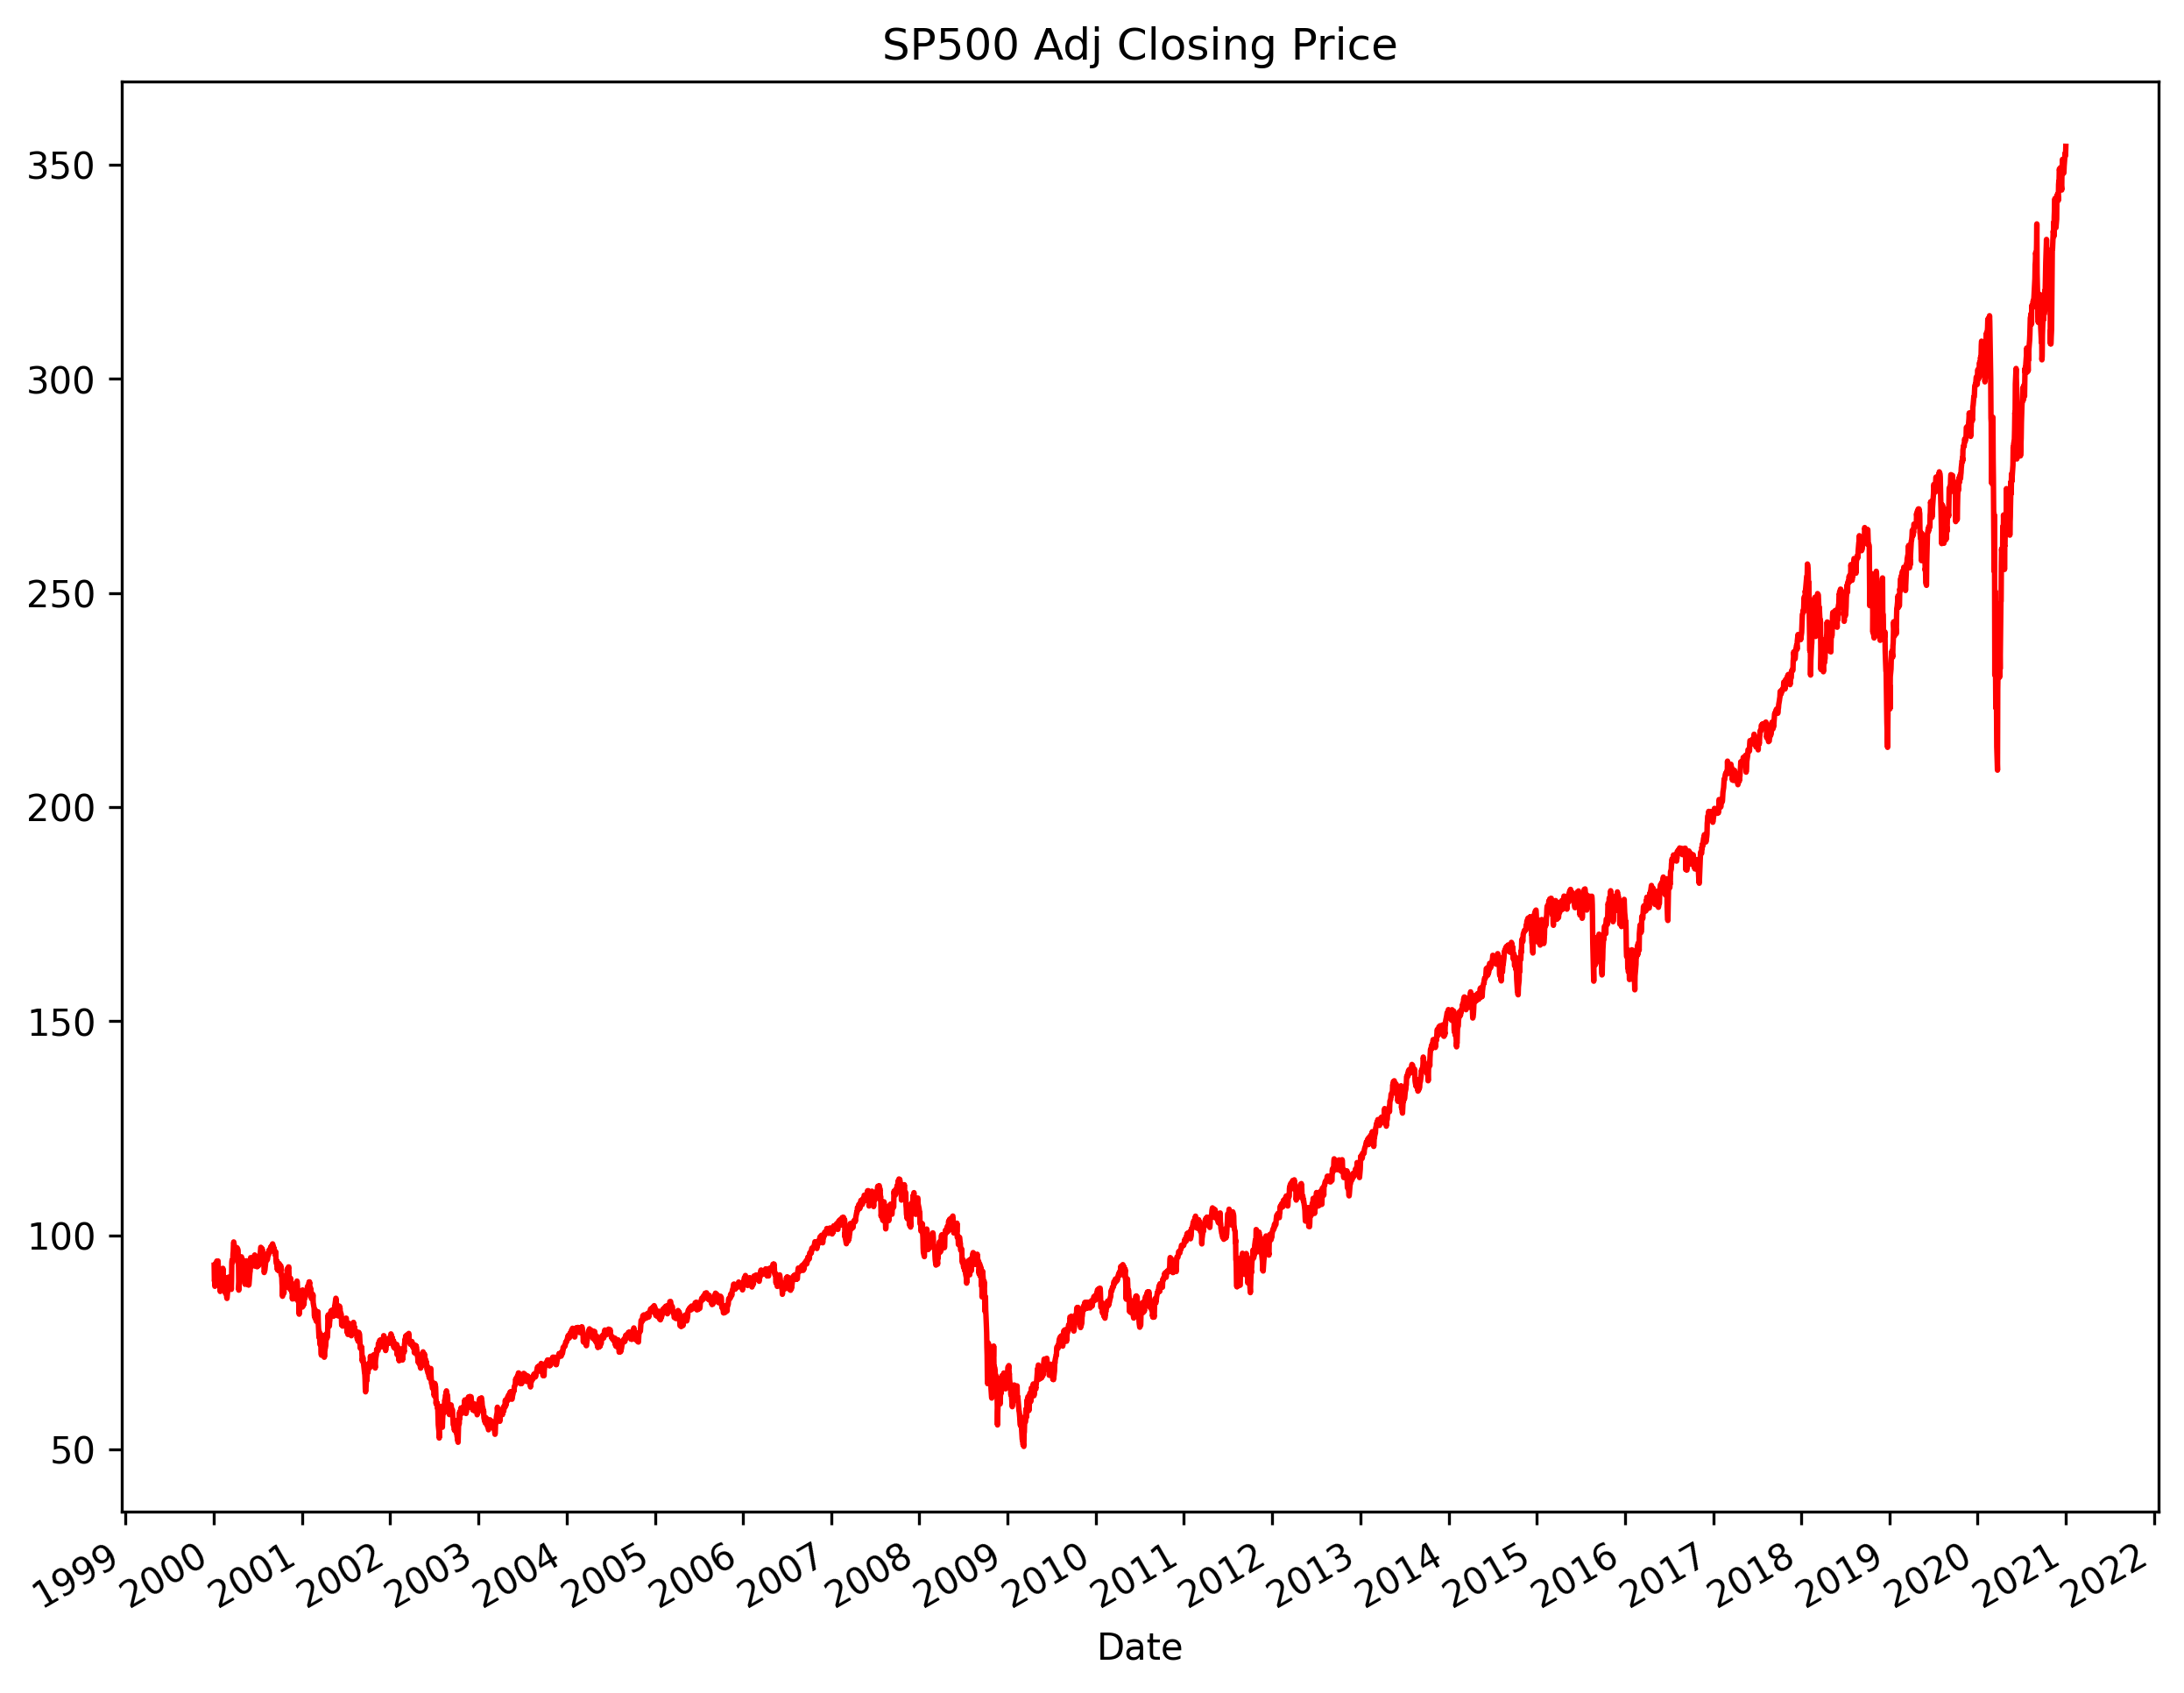

In [71]:
plt.figure(figsize=(10,8), dpi=300)
ax = stock_data['Adj Close'].plot(c='r')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
ax.set_title('SP500 Adj Closing Price')
plt.show()


**Task: Create a histogram of the daily volume of shares of SPY traded. Choose a reasonable bin size.**

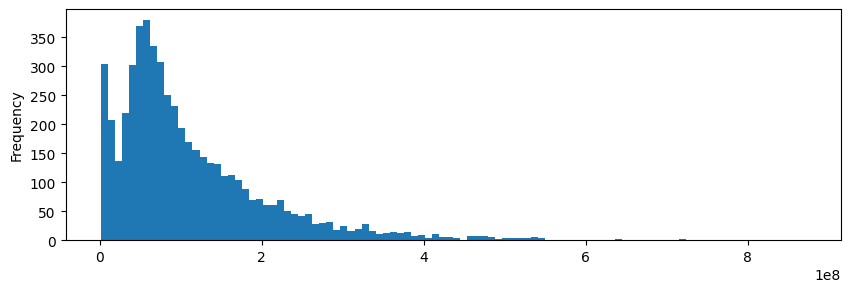

In [73]:
plt.figure(figsize=(10,3),dpi=100)
ax = stock_data['Volume'].plot(kind='hist', bins=100)

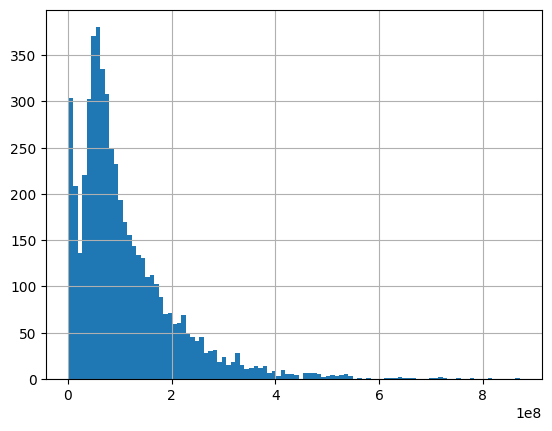

In [75]:
stock_data['Volume'].hist(bins=100)
plt.show()

**Task: Let's explore the crash and recovery of 2020 due to the COVID pandemic. Create a line plot of the Adj. Close price from 1-1-2020 to 1-1-2021. The xaxis ticks should be formatted by YYYY-MM**

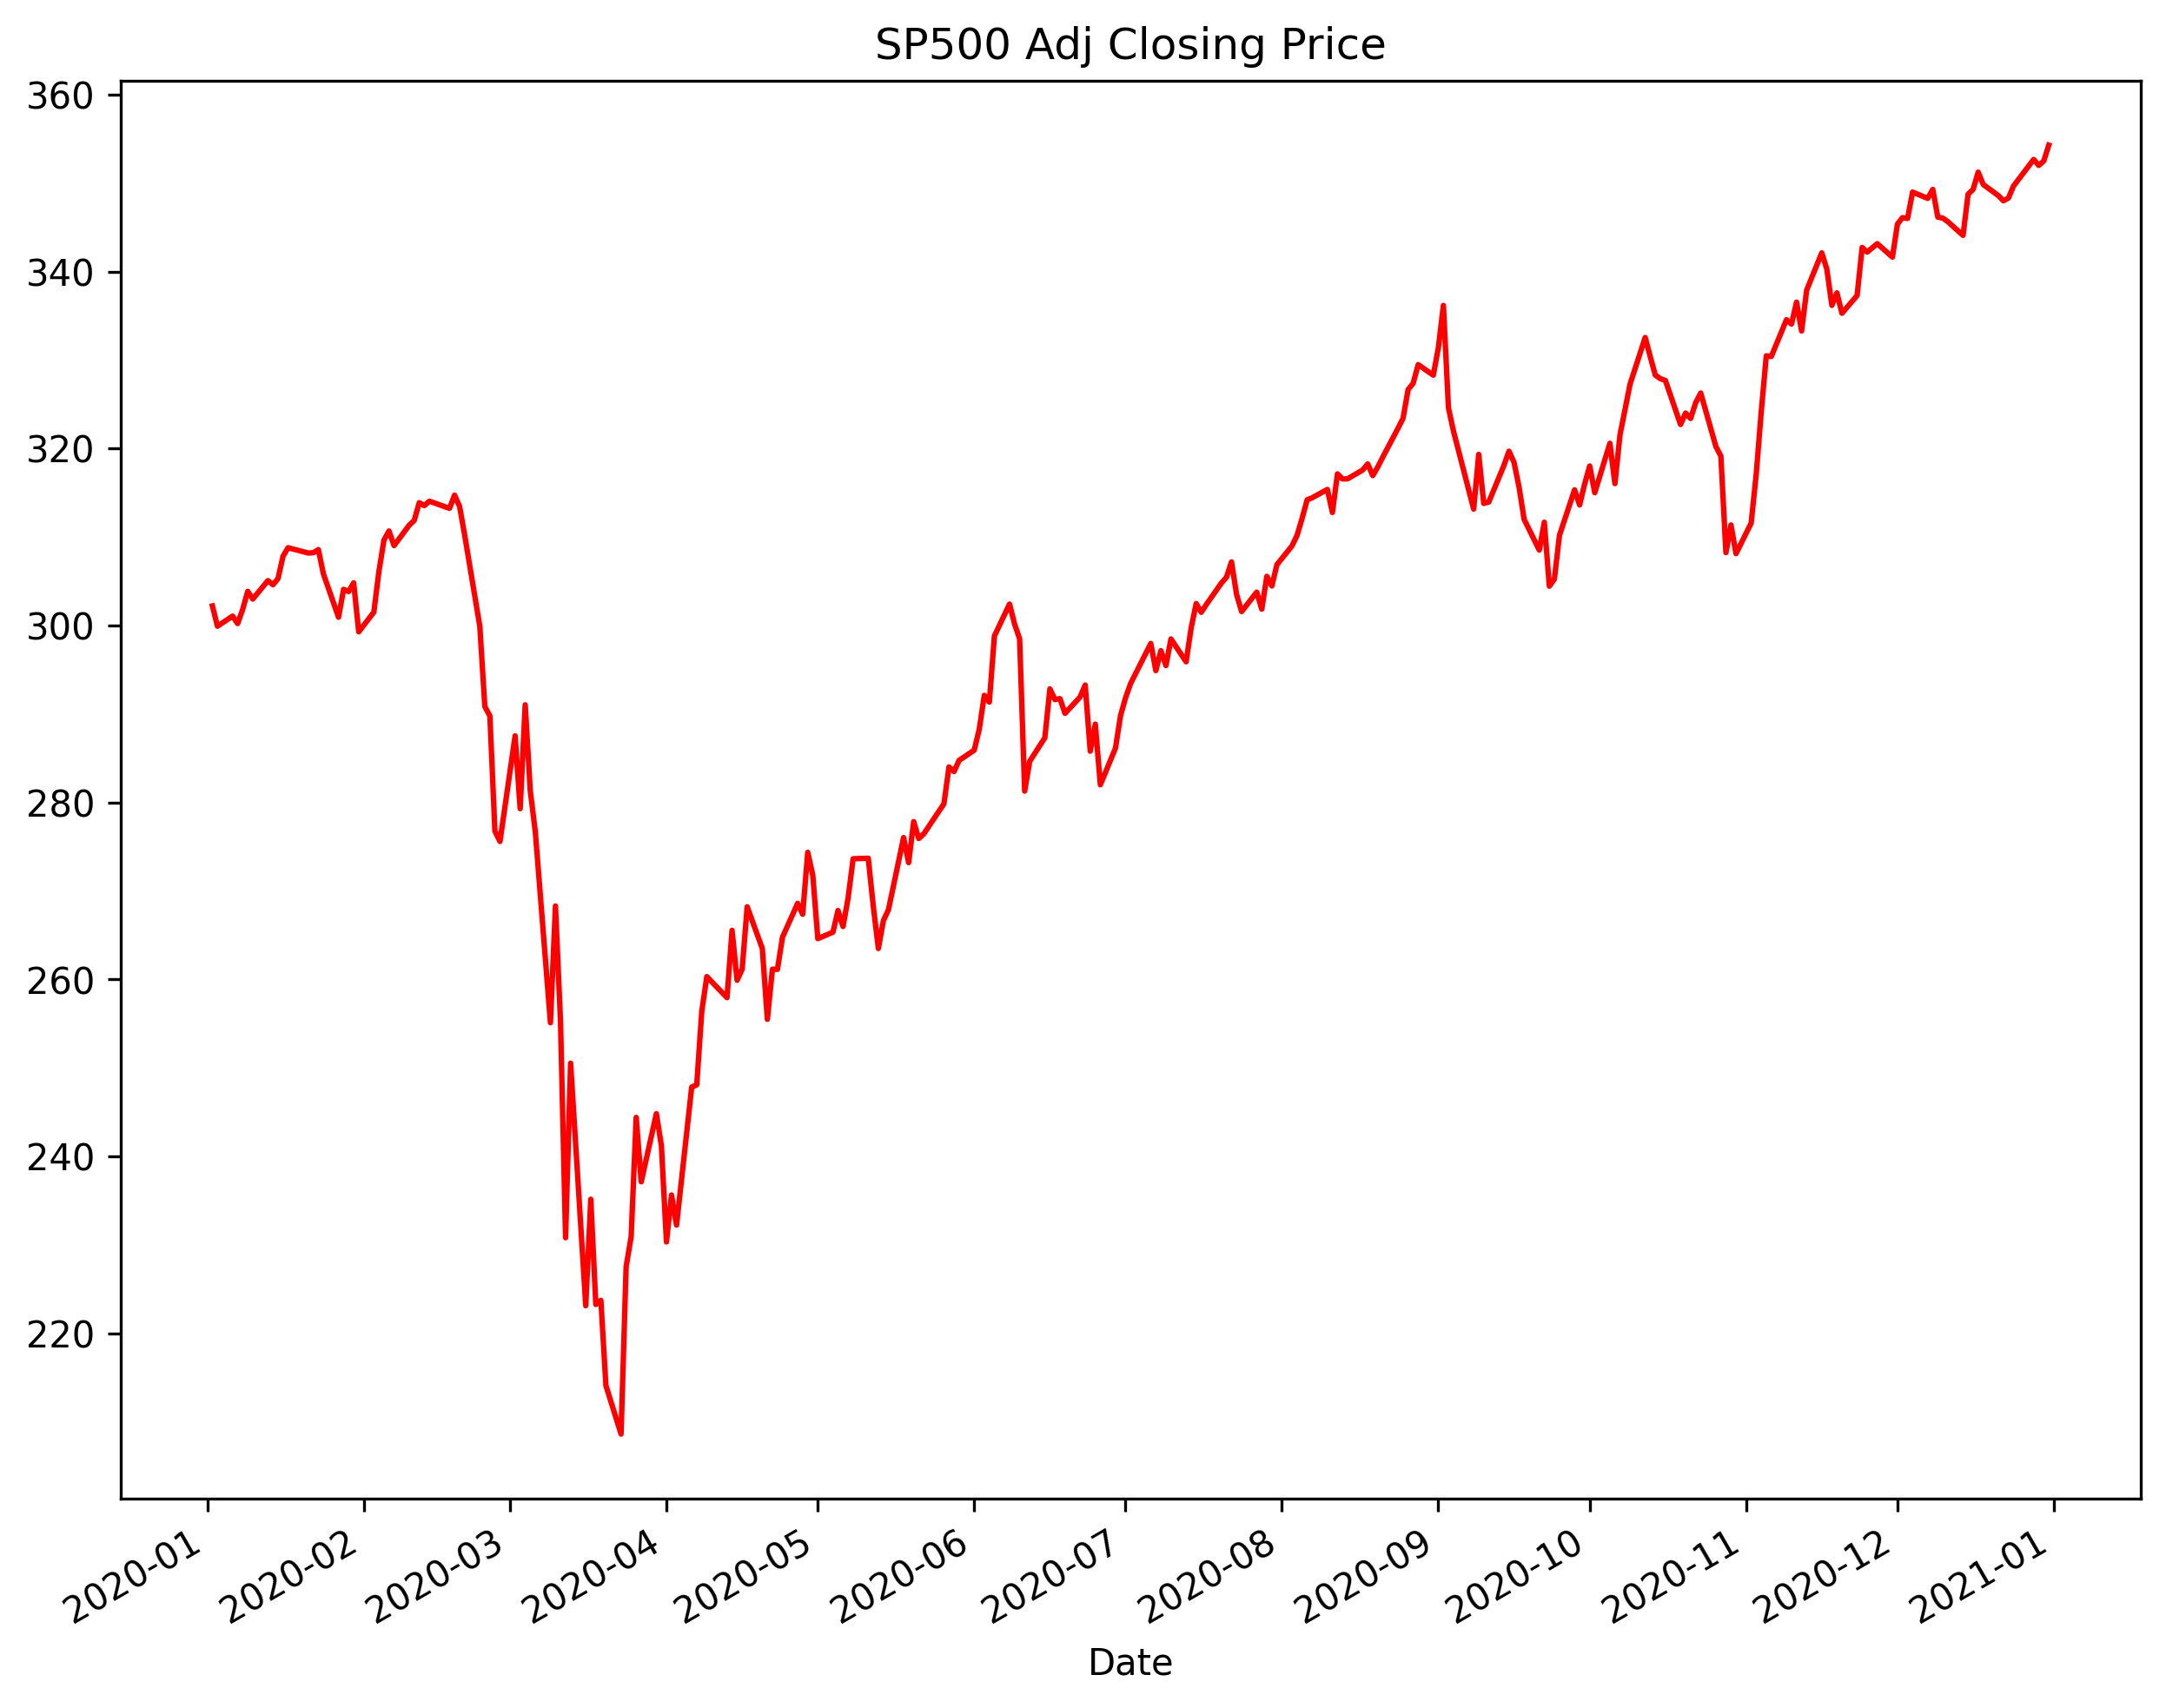

In [79]:
plt.figure(figsize=(10,8), dpi=300)
ax = stock_data['Adj Close']['2020-01-01':'2021-01-01'].plot(c='r')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.set_title('SP500 Adj Closing Price')
plt.show()

**Task: Create a plot whichs shows the adjusted closing price of SPY for the entire length of the time series along with an added trend line of the corresponding 200 days rolling mean of the adj. close price. Make sure to add a legend that identifies each line.** 

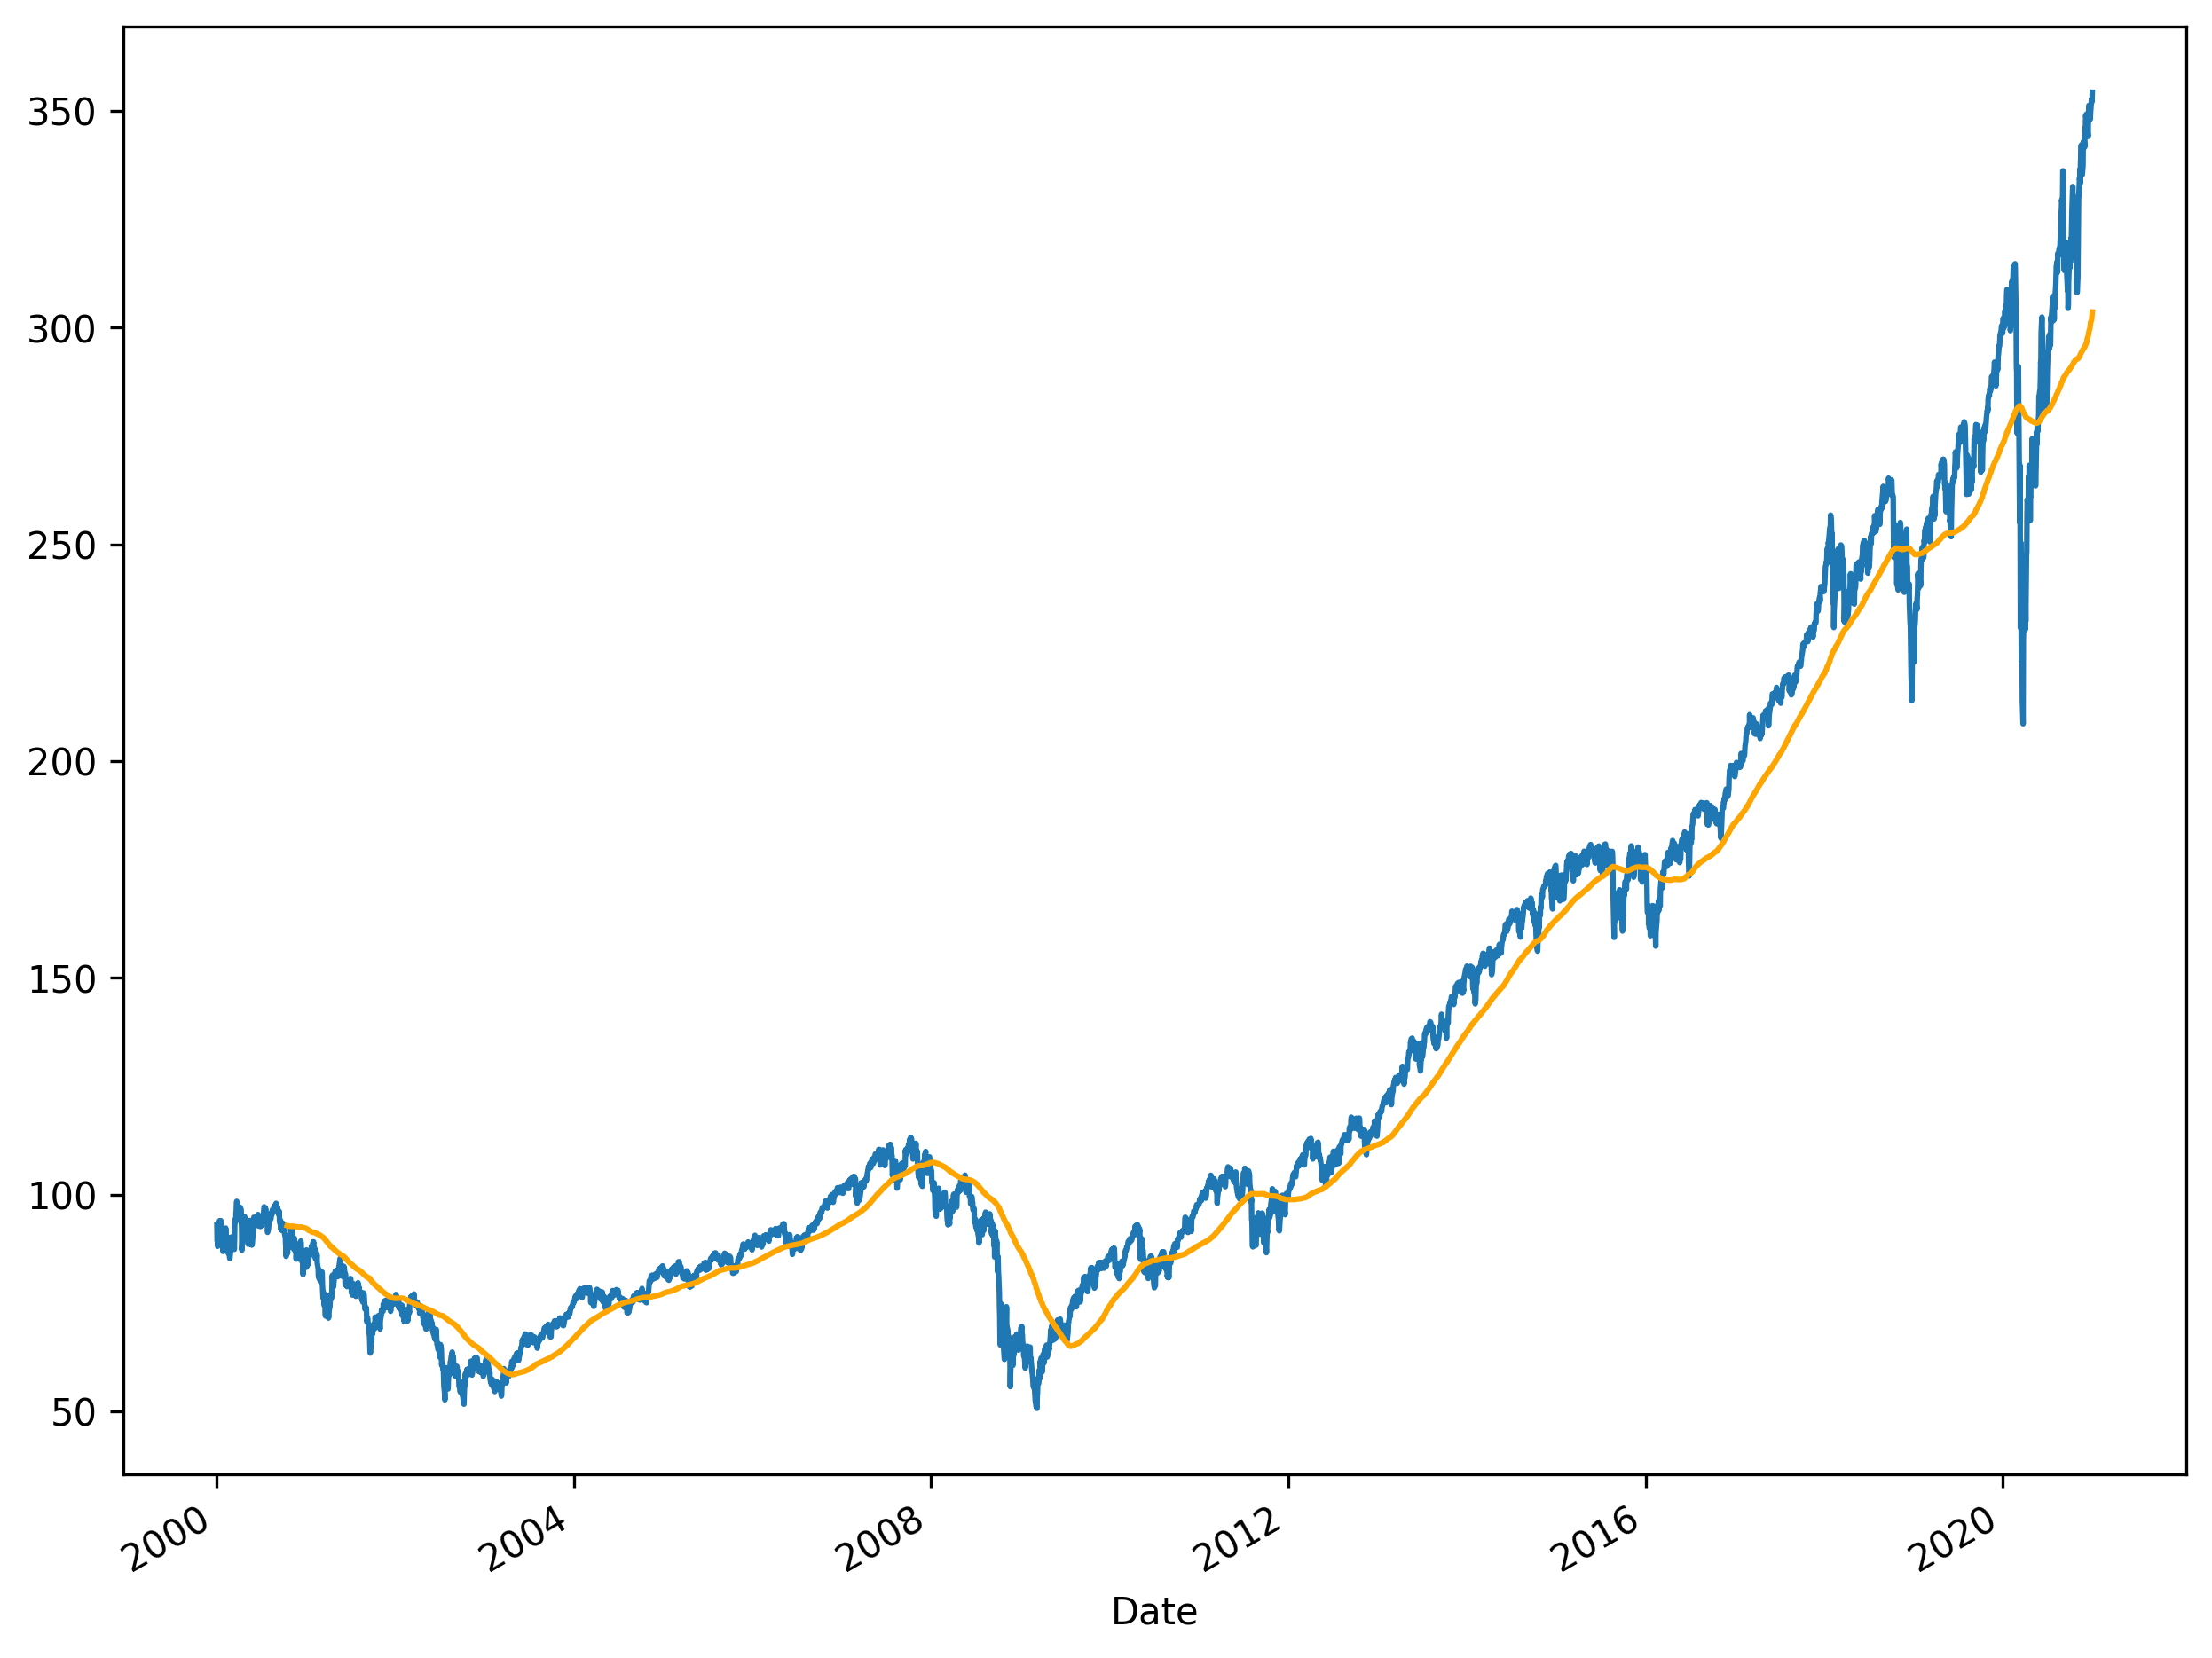

In [87]:
plt.figure(figsize=(10,8),dpi=300)
stock_data['Adj Close'].plot()
stock_data['Adj Close'].rolling(200).mean().plot(c='orange')
plt.show()

**Task: If you bought one share at the start of the time series on Jan 1st 2000, how much money would you have gained (in Adj. Close Dollar amount) by Jan 1st 2021?**


In [98]:
stock_data.iloc[-1]['Adj Close'] - stock_data.iloc[0]['Adj Close']

261.2900695800781

**Task: What was the percent increase in value (based on Adj. Close price) from Jan 1st, 2000 to Jan 1st 2021?**

In [105]:
100 * (stock_data.iloc[-1]['Adj Close'] - stock_data.iloc[0]['Adj Close']) / stock_data.iloc[0]['Adj Close']

280.9421292787144

**Task: Return the 10 dates with the largest gain for the SPY.**

In [108]:
stock_data['Adj Close'].pct_change(1).sort_values(ascending=False).head(10)

Date
2008-10-13    0.145198
2008-10-28    0.116855
2020-03-24    0.090603
2020-03-13    0.085486
2009-03-23    0.071829
2008-11-24    0.069291
2020-04-06    0.067166
2008-11-13    0.062340
2008-10-20    0.060080
2002-07-24    0.059663
Name: Adj Close, dtype: float64

**Task: For each year in the dataset, find the Maximum Adj. Close price that SPY reached for that year.**

In [115]:
stock_data['Adj Close'].resample('Y').max()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_24116/3802793785.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  stock_data['Adj Close'].resample('Y').max()


Date
2000-12-31     98.450310
2001-12-31     89.131599
2002-12-31     77.088097
2003-12-31     75.190819
2004-12-31     83.572136
2005-12-31     89.093796
2006-12-31    101.714226
2007-12-31    113.145576
2008-12-31    105.350319
2009-12-31     85.851402
2010-12-31     97.787659
2011-12-31    106.409813
2012-12-31    117.862541
2013-12-31    152.706451
2014-12-31    175.947174
2015-12-31    180.885056
2016-12-31    198.994659
2017-12-31    240.290848
2018-12-31    265.269043
2019-12-31    300.413330
2020-12-31    354.295013
Freq: YE-DEC, Name: Adj Close, dtype: float64

**Task: What was the day with the lowest adjusted closing price in 2020? (and what was this price)** 

In [121]:
stock_data['Close']['2020'].idxmin()

Timestamp('2020-03-23 00:00:00')

In [125]:
stock_data['Adj Close']['2020'].min()

208.61764526367188

**Task: In 2020, due to the uncertainty of the COVID-19 pandemic, the S&P500 index experienced a large drop in March of 2020. What was the highest price reached in 2020 *before* April 1st, 2020.**

In [127]:
stock_data.loc["2020-01-01":"2020-04-01"]["Adj Close"].idxmax()

Timestamp('2020-02-19 00:00:00')